# ASQ-SEIR-NLIR

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

def get_asq_seir_nlir(beta, sigma, gamma, q, u, alpha, epsilon):
    def asq_seir_nlir(t, y):
        s,e,i,r = y
        n = sum(y)
        return np.array([
            (-beta * q * s * i / n) / ((1 + alpha * s / n) * (1 + epsilon * i / n)), 
            ((beta * q * s * i / n) / ((1 + alpha * s / n) * (1 + epsilon * i / n))) - sigma * u * e, 
            sigma * u * e - gamma * i, 
            gamma * i
        ])
    return asq_seir_nlir

# Euler

In [ ]:
def euler(f, h, t0, y0):
    # h - step size 
    return y0 + h * f(t0, y0)

# RK4

In [ ]:
def rk4(f, h, t0, y0):
    k1 = f(t0, y0)
    k2 = f(t0 + h/2, y0 + h * k1/2)
    k3 = f(t0 + h/2, y0 + h * k2/2)
    k4 = f(t0 + h, y0 + h * k3)
    return y0 + 1/6 * h * (k1 + 2*k2 + 2*k3 + k4)

# Case of Quezon City

In [ ]:
# Parameters for Quezon City as estimated by Santos, Gabriel Lorenzo (2022)
beta = 3.12
sigma = 0.28
gamma = 0.33 
q = 0.2
u = 0.03
alpha = 0.36 
epsilon = 0.7
f = get_asq_seir_nlir(beta, sigma, gamma, q, u, alpha, epsilon)

# Quezon City population 2022: https://worldpopulationreview.com/countries/cities/philippines
qc_pop = 2761720

# Fully vaccinated in Quezon City as of Feb 14, 2022: https://www.facebook.com/QCGov
fully_vaccinated = 2292421
estimated_efficacy = 0.77 # Computations of Nico and Thomas as of January 2022

# COVID cases as of Feb 15, 2022: https://doh.gov.ph/covid19tracker
e0 = 0 # assumption
i0 = 4581
r0 = 235533 + 2401 + (fully_vaccinated * estimated_efficacy) # recovered + dead + estimated immune 
s0 = qc_pop - (e0 + i0 + r0)
y0 = np.array([s0, e0, i0, r0])
y0

# s0 = qc_pop
# e0 = 0 
# i0 = 10
# r0 = 0
# y0 = np.array([s0, e0, i0, r0])
# y0

array([ 754040.83,       0.  ,    4581.  , 2003098.17])

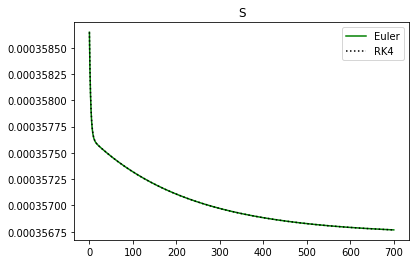

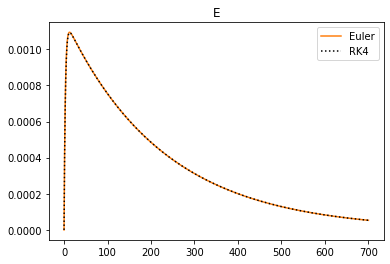

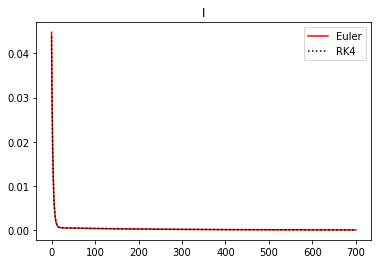

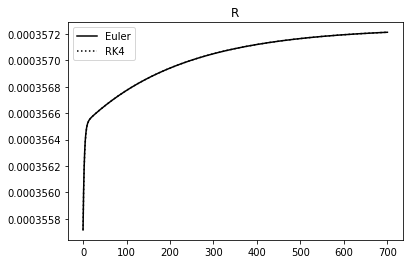

In [ ]:
seir_euler = []
seir_rk4 = []
y_euler = y0
y_rk4 = y0
h = 0.25
tn = 700
t = 0
time = []

while t <= tn:
    time.append(t)
    seir_euler.append(y_euler)
    seir_rk4.append(y_rk4)
    y_euler = euler(f, h, t, y_euler)
    y_rk4 = rk4(f, h, t, y_rk4)
    t += h
    
results_euler = pd.DataFrame(seir_euler, columns=["S","E","I","R"]) / sum(seir_euler)
results_rk4 = pd.DataFrame(seir_rk4, columns=["S","E","I","R"]) / sum(seir_rk4)

colors={
    "S": "g", 
    "E": "C1", 
    "I": "r", 
    "R": "k"
}

for state in "SEIR":
    plt.figure(state)
    plt.title(state)
    plt.plot(time, results_euler[state], label="Euler", color=colors[state])
    plt.plot(time, results_rk4[state], "k:", label="RK4")
    plt.legend()

# Case of Philippines

In [ ]:
# Parameters for PH as estimated by Santos, Gabriel Lorenzo (2022)
beta = 2
sigma = 0.28
gamma = 0.33 
q = 0.2
u = 1
alpha = 0.13
epsilon = 0.7
f = get_asq_seir_nlir(beta, sigma, gamma, q, u, alpha, epsilon)

# PH population 2022: https://www.worldometers.info/world-population/philippines-population/
ph_pop = 112041552

# Fully vaccinated in Quezon City as of Feb 9, 2022: https://doh.gov.ph/covid19-vaccination-dashboard
fully_vaccinated = 60013407
estimated_efficacy = 0.77 # Computations of Nico and Thomas as of January 2022

# COVID cases as of Feb 22, 2022: https://doh.gov.ph/covid19tracker
e0 = 0 # assumption
i0 = 56668
r0 = 3541840 + 55776 + (fully_vaccinated * estimated_efficacy) # recovered + dead + estimated immune 
s0 = ph_pop - (e0 + i0 + r0)
y0 = np.array([s0, e0, i0, r0])
y0

array([6.21769446e+07, 0.00000000e+00, 5.66680000e+04, 4.98079394e+07])

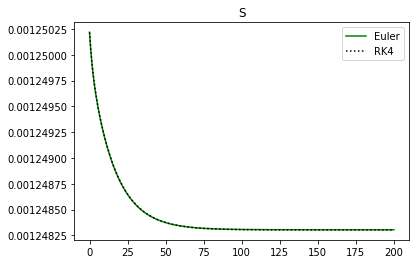

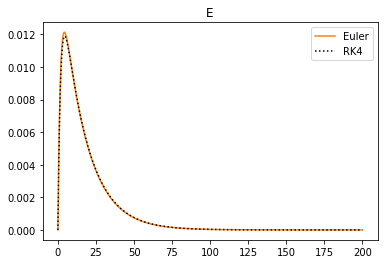

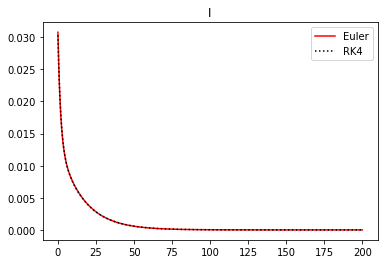

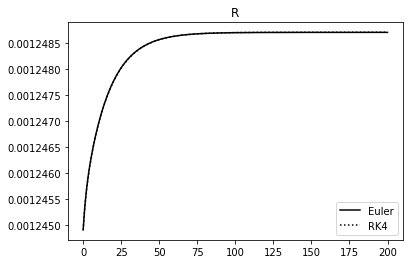

In [ ]:
seir_euler = []
seir_rk4 = []
y_euler = y0
y_rk4 = y0
h = 0.25
tn = 200
t = 0
time = []

while t <= tn:
    time.append(t)
    seir_euler.append(y_euler)
    seir_rk4.append(y_rk4)
    y_euler = euler(f, h, t, y_euler)
    y_rk4 = rk4(f, h, t, y_rk4)
    t += h
    
results_euler = pd.DataFrame(seir_euler, columns=["S","E","I","R"]) / sum(seir_euler)
results_rk4 = pd.DataFrame(seir_rk4, columns=["S","E","I","R"]) / sum(seir_rk4)

colors_={
    "S": "g", 
    "E": "C1", 
    "I": "r", 
    "R": "k"
}

for state in "SEIR":
    plt.figure(state)
    plt.title(state)
    plt.plot(time, results_euler[state], label="Euler", color=colors[state])
    plt.plot(time, results_rk4[state], "k:", label="RK4")
    plt.legend()

# Dummy Data

In [ ]:
# SEIRDV
vaccine_efficacy = 0.77 # expected value
fully_vaccinated = 8616362 # As of Nov 18, 2021
n = 13484462
e0 = 0 
i0 = 4789
r0 = 843882 + 10648 + vaccine_efficacy * fully_vaccinated # recovered + dead + immune
s0 = n - (e0 + i0 + r0)
y0 = np.array([s0, e0, i0, r0])

# Parameters
beta = 3.2
sigma = 1/7 # incubation period = 7 days
gamma = 0.33
q = 1
u = 0.5 # age 
alpha = 0.36 # behavioral factors
epsilon = 0.10 # disease-resistance factors: healthy living, natural immunity.
f = get_asq_seir_nlir(beta, sigma, gamma, q, u, alpha, epsilon)

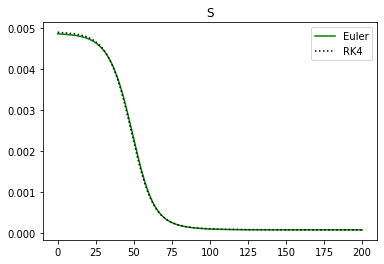

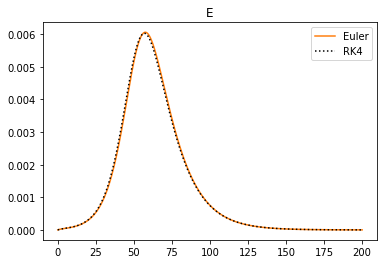

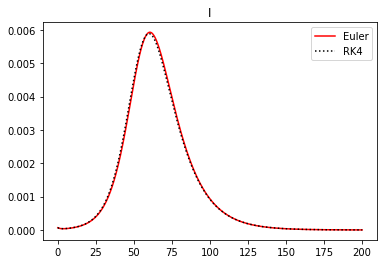

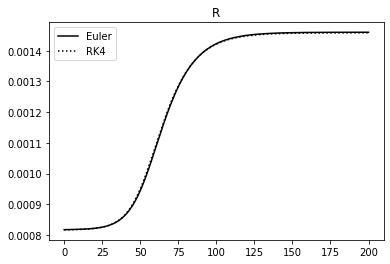

In [ ]:
seir_euler = []
seir_rk4 = []
y_euler = y0
y_rk4 = y0
h = 0.25
tn = 200
t = 0
time = []

while t <= tn:
# for t in range(steps):
    time.append(t)
    seir_euler.append(y_euler)
    seir_rk4.append(y_rk4)
    y_euler = euler(f, h, t, y_euler)
    y_rk4 = rk4(f, h, t, y_rk4)
    t += h
    
results_euler = pd.DataFrame(seir_euler, columns=["S","E","I","R"]) / sum(seir_euler)
results_rk4 = pd.DataFrame(seir_rk4, columns=["S","E","I","R"]) / sum(seir_rk4)

colors_={
    "S": "g", 
    "E": "C1", 
    "I": "r", 
    "R": "k"
}

for state in "SEIR":
    plt.figure(state)
    plt.title(state)
    plt.plot(time, results_euler[state], label="Euler", color=colors[state])
    plt.plot(time, results_rk4[state], "k:", label="RK4")
    plt.legend()